In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""


In [2]:
import re

In [3]:
l = "color or colour"

In [4]:
pattern  = re.compile("colou?r")
#pattern  = re.compile("colour|color")
pattern.findall(l)

['color', 'colour']

In [5]:
re.findall("[a-z]",l)

['c', 'o', 'l', 'o', 'r', 'o', 'r', 'c', 'o', 'l', 'o', 'u', 'r']

###### Get data

In [6]:
def get_city_info(city_coordination):
    city_location = {}
    for line in city_coordination.split("\n"):
        if line.startswith("//"):continue
        if line.strip() == "":continue
            
            
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = tuple(map(float,x_y))
        city_location[city] = x_y
    return city_location


In [7]:
city_info = get_city_info(coordination_source)

In [8]:
city_info

{'上海': (121.48, 31.22),
 '乌鲁木齐': (87.68, 43.77),
 '兰州': (103.73, 36.03),
 '北京': (116.46, 39.92),
 '南京': (118.78, 32.04),
 '南宁': (108.33, 22.84),
 '南昌': (115.89, 28.68),
 '合肥': (117.27, 31.86),
 '呼和浩特': (111.65, 40.82),
 '哈尔滨': (126.63, 45.75),
 '嘉峪关': (98.17, 39.47),
 '天津': (117.2, 39.13),
 '太原': (112.53, 37.87),
 '广州': (113.23, 23.16),
 '成都': (104.06, 30.67),
 '拉萨': (102.73, 25.04),
 '杭州': (120.19, 30.26),
 '武汉': (114.31, 30.52),
 '沈阳': (123.38, 41.8),
 '济南': (117.0, 36.65),
 '澳门': (113.54, 22.19),
 '石家庄': (114.48, 38.03),
 '福州': (119.3, 26.08),
 '西宁': (101.74, 36.56),
 '西安': (108.95, 34.27),
 '贵阳': (106.71, 26.57),
 '郑州': (113.65, 34.76),
 '重庆': (106.54, 29.59),
 '银川': (106.27, 38.47),
 '长春': (125.35, 43.88),
 '长沙': (113.0, 28.21),
 '香港': (114.17, 22.28)}

In [9]:
import math 
def geo_distance(orign,destination):
    lat1,lon1 = orign
    lat2,lon2 = destination
    radius = 6371  #km
    
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon2)
    a = (math.sin(dlat / 2)*math.sin(dlat / 2) +
        math.cos(math.radians(lat1))*math.cos(math.radians(lat2))*
        math.sin(dlon /2)*math.sin(dlon /2))
    c = 2* math.atan2(math.sqrt(a),math.sqrt(1-a))
    d = radius * c
    return d


In [10]:
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])
get_city_distance("杭州","上海")

143.44145537148142

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
city_info.keys()

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门'])

In [13]:
city_info.values()

dict_values([(103.73, 36.03), (98.17, 39.47), (101.74, 36.56), (104.06, 30.67), (114.48, 38.03), (102.73, 25.04), (106.71, 26.57), (114.31, 30.52), (113.65, 34.76), (117.0, 36.65), (118.78, 32.04), (117.27, 31.86), (120.19, 30.26), (115.89, 28.68), (119.3, 26.08), (113.23, 23.16), (113.0, 28.21), (123.38, 41.8), (125.35, 43.88), (126.63, 45.75), (112.53, 37.87), (108.95, 34.27), (116.46, 39.92), (121.48, 31.22), (106.54, 29.59), (117.2, 39.13), (111.65, 40.82), (108.33, 22.84), (106.27, 38.47), (87.68, 43.77), (114.17, 22.28), (113.54, 22.19)])

In [14]:
#city_graph = nx.Graph()
#city_graph.add_nodes_from(list(city_info.keys()))
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys()))  

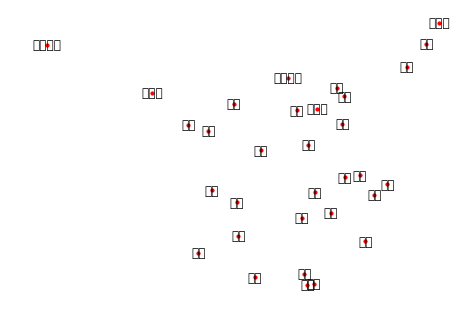

In [15]:
#nx.draw(city_graph,city_info,with_labels= True,node_size = 10)
nx.draw(city_graph, city_info, with_labels=True, node_size=10)

In [16]:
threshold = 400
from collections import defaultdict

In [17]:
def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities  = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2: continue
            
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection
cities_connection = build_connection(city_info)

In [18]:
cities_connection

defaultdict(list,
            {'上海': ['南京', '杭州', '福州', '沈阳'],
             '兰州': ['西宁', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '北京': ['石家庄',
              '武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '天津',
              '香港',
              '澳门'],
             '南京': ['济南', '合肥', '杭州', '南昌', '福州', '北京', '上海', '天津'],
             '南宁': ['贵阳', '西安', '重庆', '呼和浩特', '银川'],
             '南昌': ['石家庄',
              '武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '福州',
              '广州',
              '长沙',
              '太原',
              '北京',
              '天津',
              '香港',
              '澳门'],
             '合肥': ['石家庄',
              '武汉',
              '济南',
              '南京',
              '杭州',
              '南昌',
              '福州',
              '北京',
              '天津',
              '

In [19]:
cities_connection_graph = nx.Graph(cities_connection)

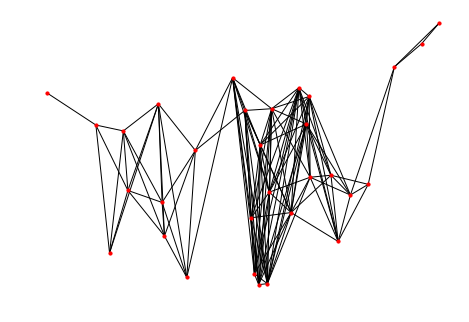

In [20]:
nx.draw(cities_connection_graph,city_info,with_lables = True,node_size = 10)

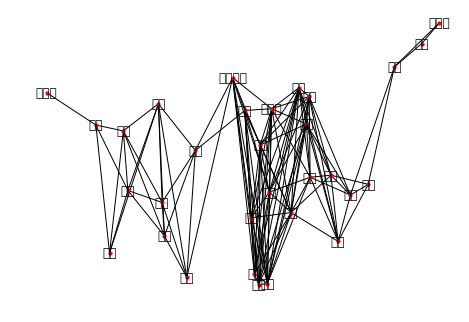

In [21]:
nx.draw(cities_connection_graph,city_info,with_labels = True,node_size = 10)

In [22]:
def search_1(graph,start,destination):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in visited: continue
        
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path:continue
            
            new_path = path+[city]
            pathes.append(new_path)
            
            if city == destination:
                return new_path
        visited.add(froniter)
        
search_1(cities_connection,"上海","兰州")            

['上海', '南京', '南昌', '太原', '西安', '贵阳', '兰州']

In [23]:
def search_2(graph,start,destination,search_strategy):
    pathes = [[start]]
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        successsors = graph[froniter]
        
        for city in successsors:
            if  city in path:continue
            
            new_path =path+[city]
            
            pathes.append(new_path)
            pathes = search_strategy(pathes)
        if pathes and (destination == pathes[0][-1]):
            return pathes[0]

In [24]:
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_city_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key = get_distance_of_path)

In [25]:
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    return distance


get_distance_of_path(["北京","济南","上海"])
    

558.1985317556861

In [26]:
get_distance_of_path(["北京","郑州","上海"])

1183.1140194981033

In [ ]:
search_2(cities_connection,"北京","上海",search_strategy=lambda x:x)

['北京', '南京', '上海']

In [ ]:
search_2(cities_connection,"北京","上海",search_strategy=sort_by_distance)

In [ ]:
search_2(cities_connection,"北京","上海",search_strategy=sort_by_distance)